# Analyzing the Funding Landscape of Indian Startups

### This project examines the dynamic landscape of India's startup funding based on a comprehensive dataset of startup investments. Using this project, data visualization techniques will be utilized to answer the following important questions:

- Temporal Trends: How has the funding ecosystem evolved over time, in relation to changes in investment patterns and economic conditions?
- Funding Amounts: What is the range of typical funding amounts the startups in India receive?
- Industry Preferences: Which ones most attract investors, and how does this industry preference affect the success of a startup?
- Geographical Influence: Does the location of a startup have an impact on its growth and how it relates to fund availability?
- Ecosystem Stakeholders: Who are the key stakeholders that make up the Indian startup ecosystem, such as investors, incubators, and accelerators?
- Funding Formations: What are the different forms of funding available, and how they get disbursed among the startup?

In [37]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataframe for analysis using pandas

In [38]:
data = pd.read_csv("StartUp_Funding.csv")

In [39]:
data

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,9/1/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


### Set Sr No as index

In [40]:
data.set_index('Sr No', inplace = True)
data

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,9/1/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...
3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"


### Checking the null values in each feature

In [41]:
data.isna().sum()

Date dd/mm/yyyy        0
Startup Name           0
Industry Vertical    171
SubVertical          936
City  Location       180
Investors Name        24
InvestmentnType        4
Amount in USD        960
dtype: int64

### Detailed information about the dataset

In [42]:
data.describe()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
count,3044,3044,2873,2108,2864,3020,3040,2084
unique,1034,2457,821,1942,107,2408,55,471
top,2/2/2015,Ola Cabs,Consumer Internet,Online Lending Platform,Bangalore,Undisclosed Investors,Private Equity,"10,00,000"
freq,11,8,941,11,701,39,1356,165


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date dd/mm/yyyy    3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  2873 non-null   object
 3   SubVertical        2108 non-null   object
 4   City  Location     2864 non-null   object
 5   Investors Name     3020 non-null   object
 6   InvestmentnType    3040 non-null   object
 7   Amount in USD      2084 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


### Cleaning the column Amount in USD 

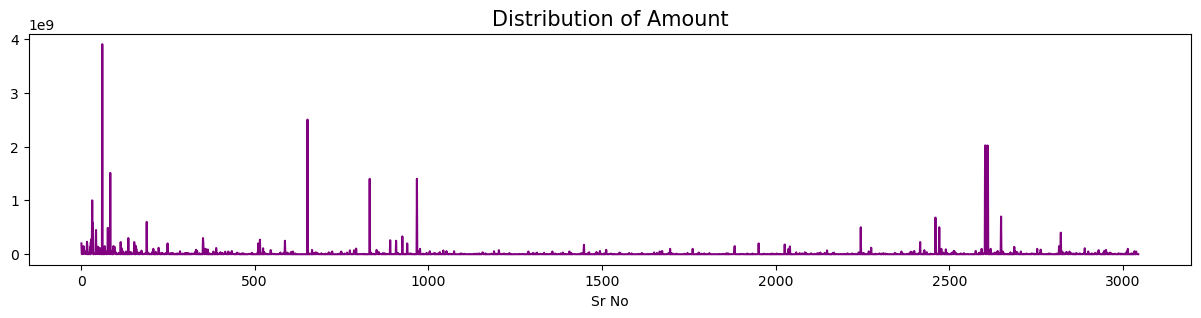

In [44]:
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

# lets apply the function on the column
data["Amount in USD"] = data["Amount in USD"].apply(lambda x: float(clean_amount(x)))

# lets check the head of the column after cleaning it
plt.rcParams['figure.figsize'] = (15, 3)
data['Amount in USD'].plot(kind = 'line', color = 'purple')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

### Rename the column Date and City

In [66]:
data.rename(columns ={'Date dd/mm/yyyy':'Date','City Location':'City'}, inplace = True)
data

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,yearmonth
Sr No,,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000.0,202001
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,202001
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,202001
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,202001
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,202001
...,...,...,...,...,...,...,...,...,...
3040,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0,201501
3041,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0,201501
3042,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,201501


### Cleaning the Date column 

In [46]:
pd.options.mode.copy_on_write = True
data.loc[data['Date']=='12/05.2015','Date'] = '12/05/2015'
data.loc[data['Date'] == '13/04.2015', 'Date'] = '13/04/2015'
data.loc[data['Date']  == '15/01.2015', 'Date'] = '15/01/2015'
data.loc[data['Date']  == '05/072018', 'Date'] = '05/07/2018'
data.loc[data['Date']  == '01/07/015', 'Date'] = '01/07/2015'
data.loc[data['Date']=='22/01//2015','Date'] = '22/01/2015'
data.loc[data['Date']=='05/072018','Date'] = '05/07/2018'
data.loc[data['Date']=='01/07/015','Date'] = '01/07/2015'
data.loc[data['Date']=='\\\\xc2\\\\xa010/7/2015','Date'] = '10/07/2015'

### Changing dtype from object to datetime

In [47]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [48]:
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()


Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201507     98
201606     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


### Let's plot the data on number of fundings per month

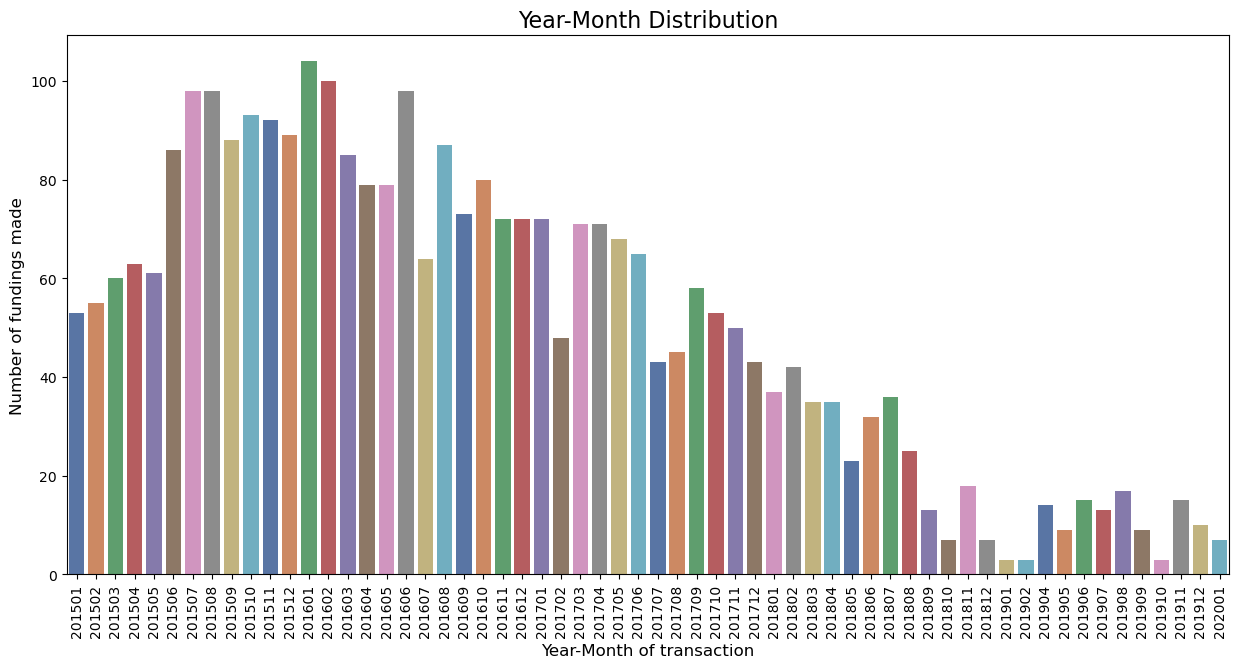

In [49]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(x = year_month.index,y = year_month.values, palette = 'deep')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

### Who Received the Maximum Funding

In [50]:
print('largest funding is', data['Amount in USD'].sort_values().max(),
'for startup',data[data['Amount in USD'] == 3900000000.0]['Startup Name'])

largest funding is 3900000000.0 for startup Sr No
61    Rapido Bike Taxi
Name: Startup Name, dtype: object


### Those who recieved fundings more then one crors (ascending)

In [51]:
data[data['Amount in USD'] >= 100000000.0].sort_values(by = 'Amount in USD', ascending = False)

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,yearmonth
Sr No,,,,,,,,,
61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09,201908
652,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,201708
2603,2015-07-09,News in shorts,News Aggregator mobile app,NaN,Noida,Tiger Global,Private Equity,2.020000e+09,201507
2609,2015-07-10,Loylty Rewards,Premium Loyalty Rewards Point Management,NaN,Mumbai,IndianIdeas.com,Private Equity,2.019350e+09,201507
2604,2015-07-09,Bluestone,Online Jewellery Store,NaN,Bangalore,"IvyCap Ventures, Accel Partners, Dragoneer Inv...",Private Equity,2.016200e+09,201507
...,...,...,...,...,...,...,...,...,...
2593,2015-07-08,Saavn,Music Streaming App,NaN,Mumbai,"Tiger Global Management, Bertelsmann India, St...",Private Equity,1.000000e+08,201507
2477,2015-08-03,Oyorooms,Budget Hotel accommodation brand,NaN,New Delhi,"SoftBank Group, Greenoaks Capital, Sequoia Cap...",Private Equity,1.000000e+08,201508
1696,2016-05-11,Fractal Analytics,Technology,Data Analytics Company,Mumbai,Khazanah Nasional Berhad,Private Equity,1.000000e+08,201605


In [52]:
data[data['Amount in USD'] == -999.0].shape

(967, 9)

### Average Funding

In [53]:
print("On Average indian startups got funding of : ", data["Amount in USD"].dropna().sort_values().mean())

On Average indian startups got funding of :  15977024.120565046


## Let's check the no. of funding each startsup got

In [54]:
print("Total startups funded : ", len(data["Startup Name"].unique()))
print(data["Startup Name"].value_counts().head(10))
startupname = data['Startup Name'].value_counts().head(20)

Total startups funded :  2457
Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
NoBroker     6
Medinfi      6
Nykaa        6
Meesho       6
Jugnoo       5
Grofers      5
Name: Startup Name, dtype: int64


## Graph on above output

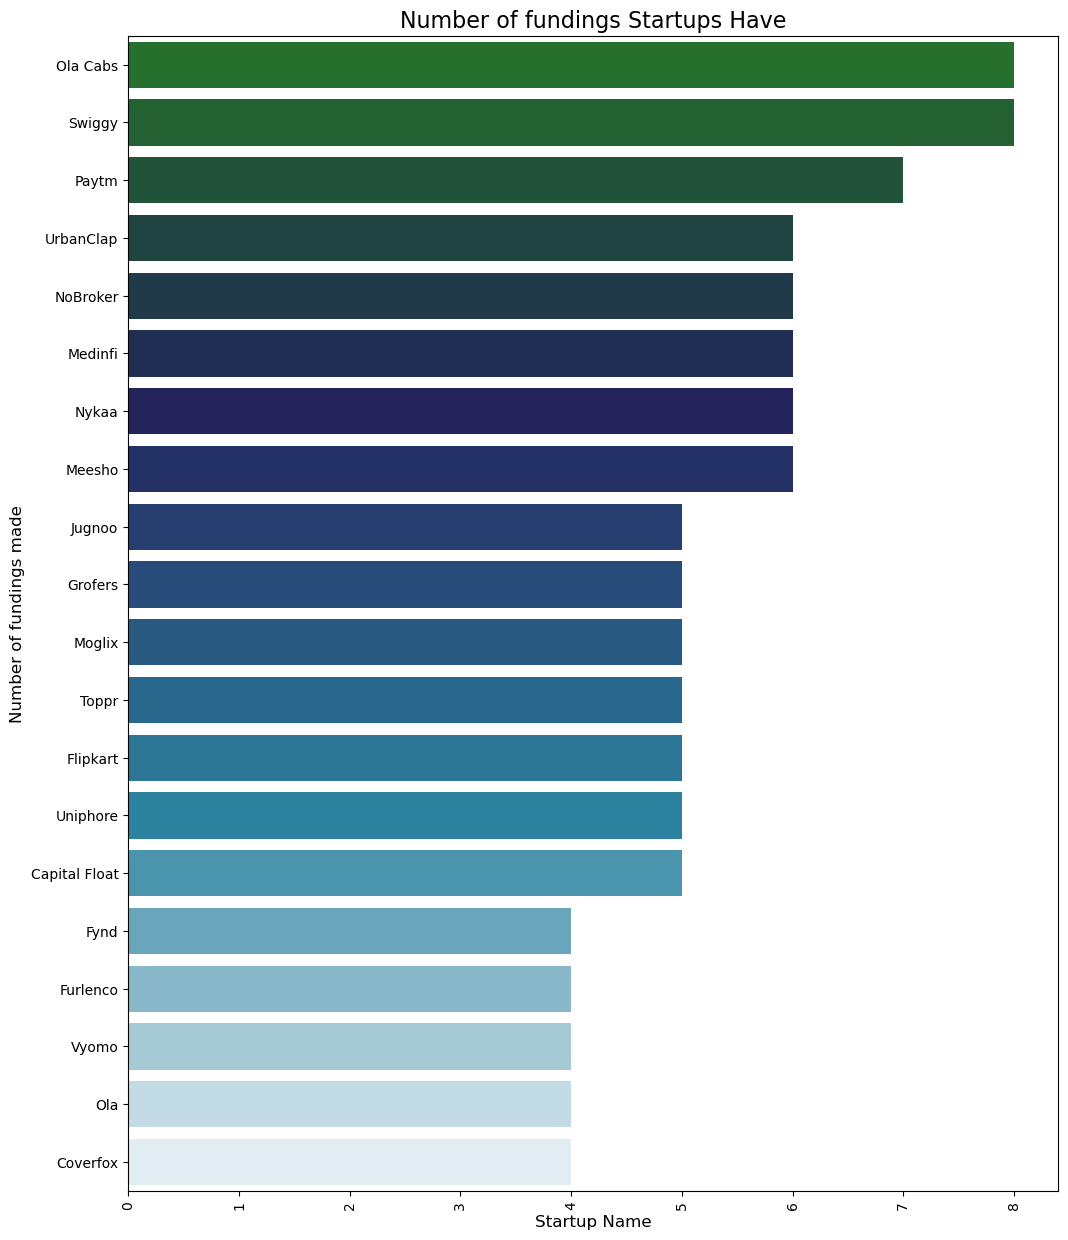

In [55]:
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'ocean')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

## Data cleaning to analyze the industry of the startups

In [56]:
data['Industry Vertical'] = data['Industry Vertical'].replace('nan', 'Consumer Technology')

industry = data['Industry Vertical'].value_counts().head(10)
print(industry)

Consumer Internet    941
Technology           478
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       23
Name: Industry Vertical, dtype: int64


## Top 10 Industry verticals with largest Funding

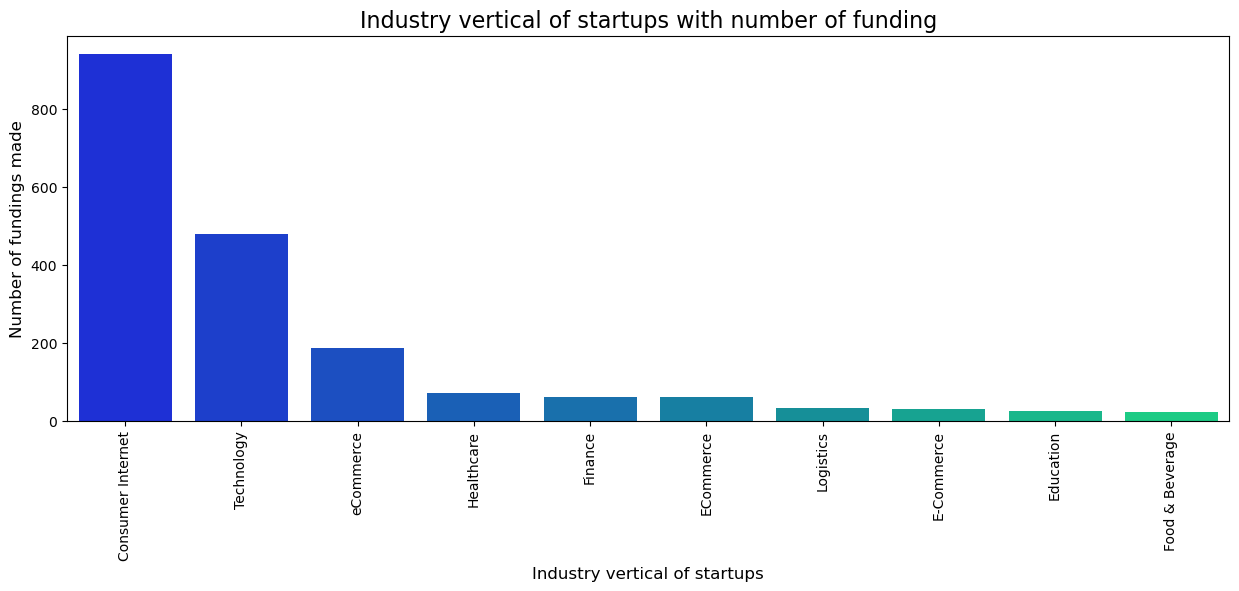

In [31]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(x = industry.index,y = industry.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

### Wordcloud for investor names

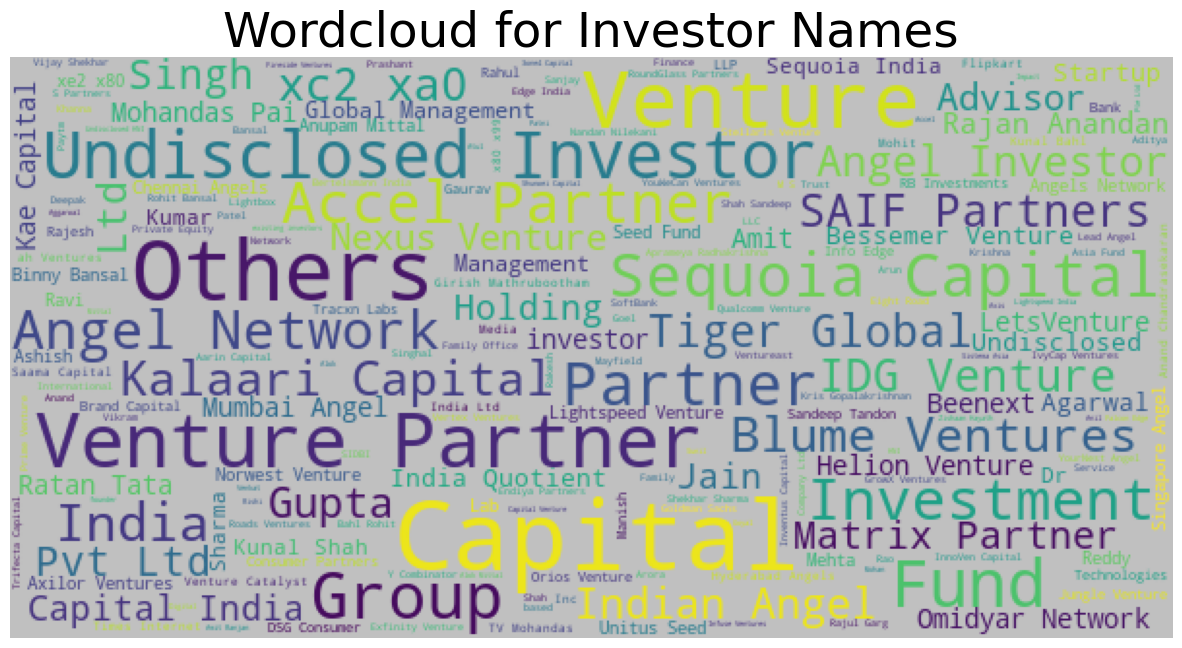

In [57]:
from wordcloud import WordCloud

names = data["Investors Name"][~pd.isnull(data["Investors Name"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'silver').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

## Analyzing the effect of Cities on a Startup

In [58]:
data['City  Location'] = data['City  Location'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))

city = data['City  Location'].value_counts().head(10)
print(city)

Bangalore    842
Mumbai       568
New Delhi    424
Gurgaon      291
Pune         105
Hyderabad     99
Chennai       97
Noida         93
Gurugram      50
Ahmedabad     38
Name: City  Location, dtype: int64


## Top 10 Cities with largest startup Fundings

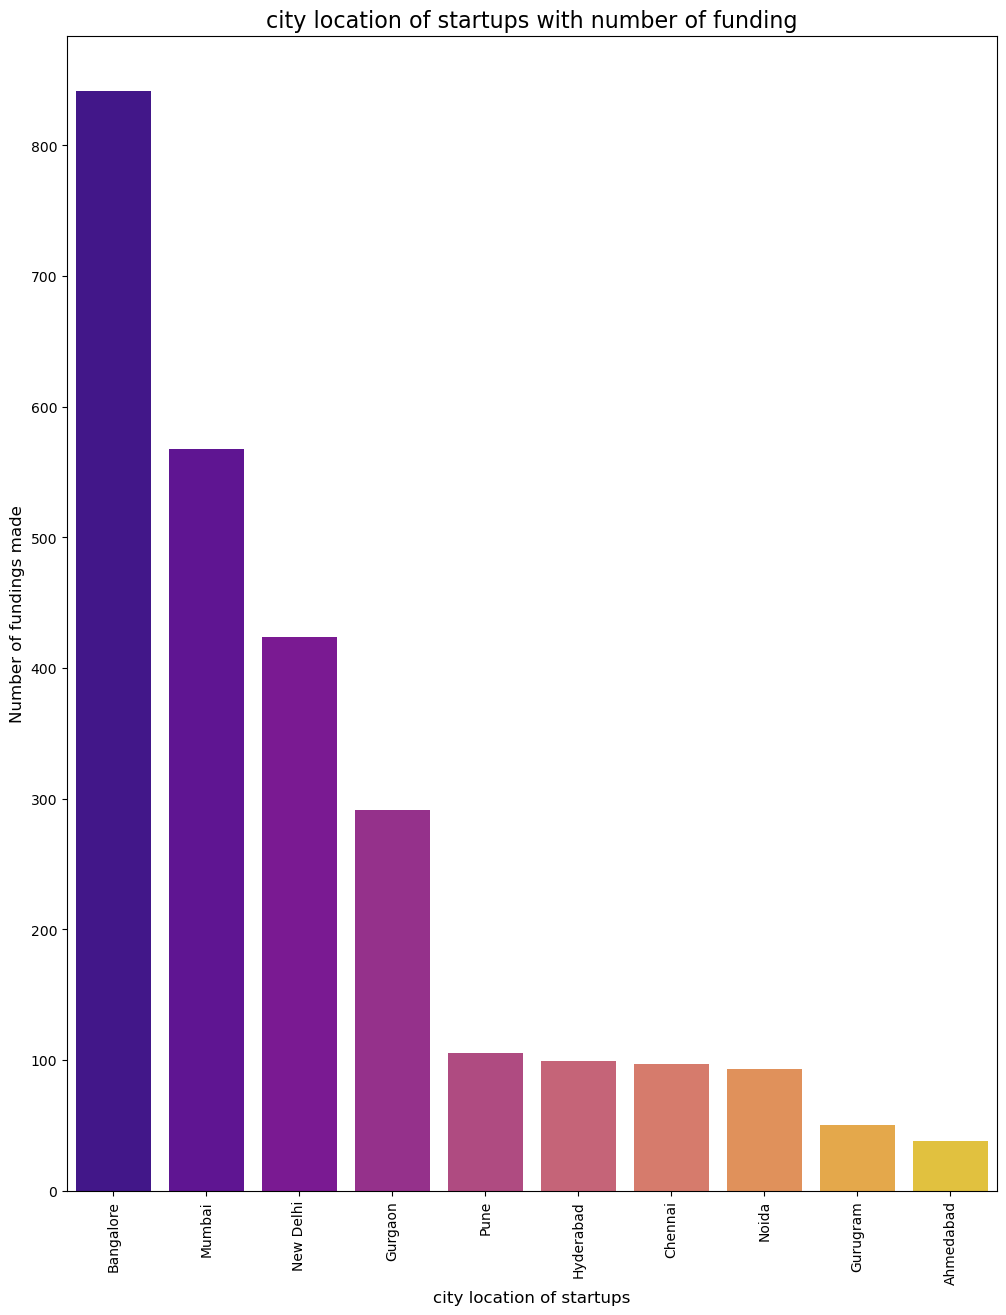

In [59]:
sns.barplot(x = city.index,y = city.values, palette = 'plasma')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

## lets analyze the investors on startups

In [60]:
# lets clean the dataset
data['Investors Name'][data['Investors Name'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'Undisclosed'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'nan'] = 'Undisclosed Investors'
pd.options.mode.copy_on_write = True
# lets check the value counts
investors = data['Investors Name'].value_counts().head(10)
print(investors)

Undisclosed Investors       39
Undisclosed investors       30
Ratan Tata                  25
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             15
Accel Partners              12
Undisclosed Investor        12
undisclosed investors       11
Name: Investors Name, dtype: int64


## Top 10 investors on startup

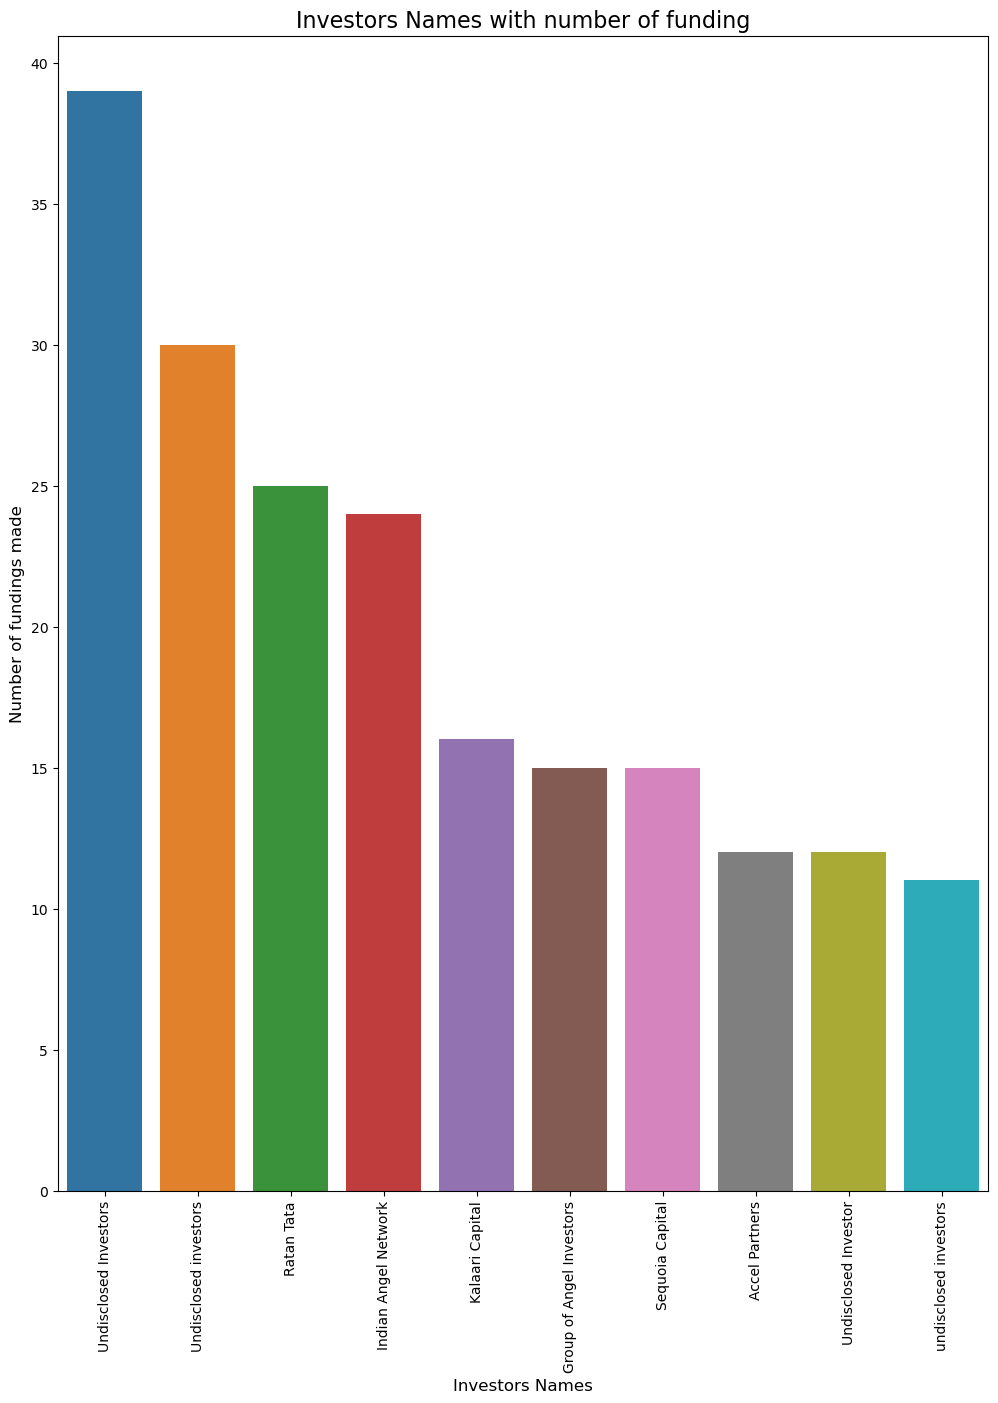

In [61]:
sns.barplot(x = investors.index,y = investors.values, palette = 'tab10')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()